# introduction:

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area, containing 183412 record with 15 variable. 
original dataset here: https://www.fordgobike.com/system-data

### variables (columns) :
 0   duration_sec          
 1   start_time              
 2   end_time                 
 3   start_station_id         
 4   start_station_name        
 5   start_station_latitude  
 6   start_station_longitude  
 7   end_station_id          
 8   end_station_name         
 9   end_station_latitude    
 10  end_station_longitude    
 11  bike_id                 
 12  user_type                 
 13  member_birth_year        
 14  member_gender           
 15  bike_share_for_all_trip 

## questions:
### unvariate:
- Q: how long the trip takes in average ?
- Q: who taking most of our trips males or females?
- Q : distrubution of ages in our data ?
- Q: the most used stations ?
- Q: what is the most start duration time ?

### bivariate:
- Q: who takes the longest durations males or females ?
- Q: what is the biger propotion of the (subscribers and customers) in eatch gender?
- Q : which gender do more bike-sharing ?

### multivariate:
- Q: the relation between (duration_minutes, member_birth_year & member_gender) ?
- Q:how the user type relates to the duration in eatch gender ?

### Hint: each question has a subslides beneath it so make sure to scroll down each question sub slide to view the code and plots.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
frd_bike = pd.read_csv('201902-fordgobike-tripdata.csv')


In [2]:
#drop the null values from produced from gender and year of birth
frd_bike.dropna(inplace=True)

## Q: how long the trip takes in average ? 

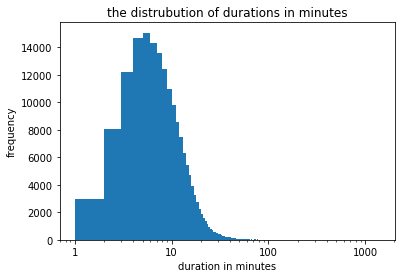

In [3]:
#creating a minutes column to reduce the range scale
frd_bike['duration_minutes'] = frd_bike.duration_sec/60
bins = 10 ** np.arange(1,5,0.1)
ticks = [1,10,100,1000]
ticks_label = ['{}'.format(i) for i in ticks]
bins = np.arange(1,1400,1)
plt.hist(frd_bike.duration_minutes,bins=bins);
plt.xscale('log');
plt.xticks(ticks, ticks_label);
plt.ylabel('frequency');
plt.xlabel('duration in minutes');
plt.title('the distrubution of durations in minutes');

### lets see how these exceptions(outliers) distrubuted 

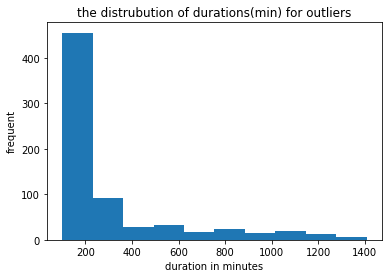

In [4]:
# i will just create this sub dataframe for the purpose of showing how this outliers disrubuted
frd_bike_sub = frd_bike[frd_bike.duration_minutes >100]
plt.hist(frd_bike_sub.duration_minutes);
plt.ylabel('frequent');
plt.xlabel('duration in minutes');
plt.title('the distrubution of durations(min) for outliers');

### alot of outliers to the right(more than 200~1400 minutes) which mean, we have some cutomers love to spend half day or day with bikes  but they are not alot (but we should put them in consideration).

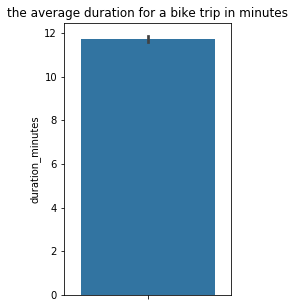

In [5]:
plt.figure(figsize=(3,5));
sns.barplot(data=frd_bike,y='duration_minutes');
plt.title('the average duration for a bike trip in minutes');

### and the average trip duration is aproximitly 11.8 minutes as  showen

## Q: who making most of our trips males or females?

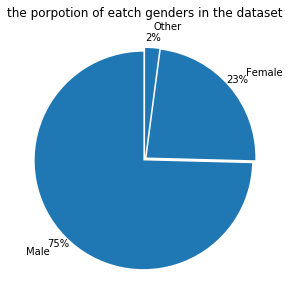

In [6]:
#get counts to drow the pie plot
counts = frd_bike['member_gender'].value_counts()
#males creates the most of our dataset by 75% while females 23%
plt.figure(figsize=(5,5));
color = sns.color_palette()[0]
plt.pie(counts, labels=counts.index, autopct='%1.0f%%', pctdistance=1.1, 
        labeldistance=1.2,startangle=90,colors=[color,color,color],explode=(0.02,0.02,0.02));
plt.title('the porpotion of eatch genders in the dataset');

 looks most of users are males by 75% and the rest (23% females) , (2% other or unkown)

## Q : distrubution of ages in our data ?

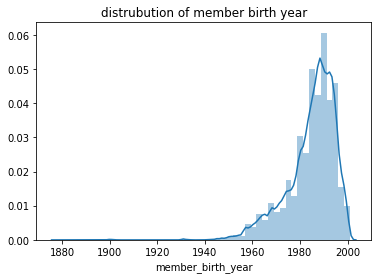

In [7]:
#drowing the distrubution with histogram to view the highest count of ages
sns.distplot(frd_bike.member_birth_year,color=color);
plt.title('distrubution of member birth year');

### the distrubution skewed to the left which means  the most of the renters are young ages 

## Q: the most used stations ?

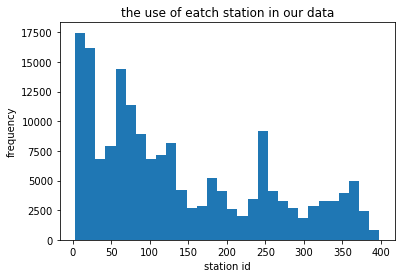

In [8]:
#now view the most used station in our data set 
plt.hist(data=frd_bike,x='start_station_id',bins=30);
plt.xlabel('station id');
plt.ylabel('frequency');
plt.title('the use of eatch station in our data');

### Q: what is the most start duration time ?

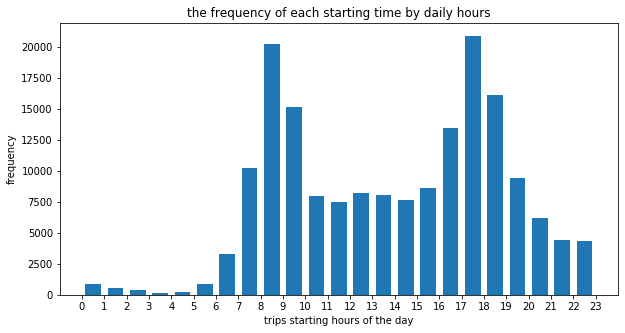

In [9]:
#turning the start time column from the object formate to date time formate to exctract the hour from eatch trip
frd_bike.start_time = pd.to_datetime(frd_bike.start_time)
#exctract the hour
hours = frd_bike.start_time.apply(lambda x: x.hour)

#use the new formated data to plot our histogram
plt.figure(figsize=(10,5))
ticks = np.arange(0,24,1)
ticks_label = ['{}'.format(i) for i in ticks]
plt.hist(hours,bins=ticks,rwidth=0.7);
plt.xticks(ticks,ticks_label);
plt.xlabel('trips starting hours of the day');
plt.ylabel('frequency');
plt.title('the frequency of each starting time by daily hours');

the distrubution is binomial with two high values between(8-9AM) and (5-6PM) we may focus in these two hours in our days to put offers and gain more of the customers

## Q: who takes the longest durations males or females ?

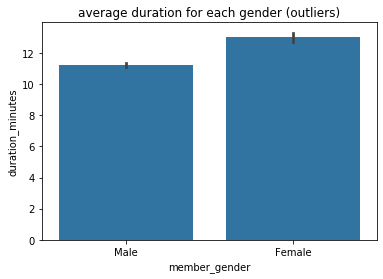

In [10]:
#for gender variable analysis i will focus only on the two main genders so creating a sub-dataframe will be usful 
frd_main_genders = frd_bike[frd_bike.member_gender.isin(['Male','Female'])]
sns.barplot(data=frd_main_genders,
            x='member_gender',y='duration_minutes',color=color,dodge=False);
plt.title('average duration for each gender (outliers)');

### it looks females like to spend more time with bikes more than males 
but what if we removed the out liers?

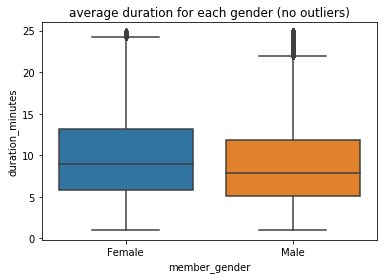

In [11]:
#this next line is for interquartile range multiplied by 1.5 added to the third quartile to calculate the new maximum value
new_max = (13.15-5.383333)*1.5 + 13.15

#this is only created to view the result without outliers
frd_bike_droped = frd_bike[frd_bike.duration_minutes<=new_max]

sns.boxplot(data=frd_bike_droped[frd_bike_droped.member_gender.isin(['Male','Female'])]
            ,x='member_gender',y='duration_minutes');
plt.title('average duration for each gender (no outliers)');

### the same result as before females durations are longer

## Q : what is the bigger propotion of the (subscribers and customers) in eatch gender?

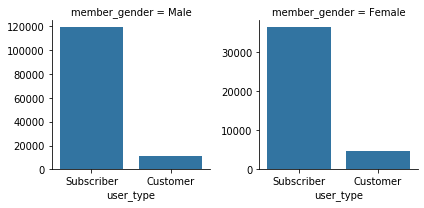

In [12]:
g = sns.FacetGrid(data=frd_main_genders,col='member_gender',sharey=False,);
g.map(sns.countplot, 'user_type',order=['Subscriber','Customer']);


in both gender the higher propotion was subscribers 

## Q : which gender do more bike-sharing ?
we can use some feature engineering here by using the (bike_share_for_all_trip, member_gender) variables to come up with the (sharing_rate) for each gender


D:\anacoda\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
D:\anacoda\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


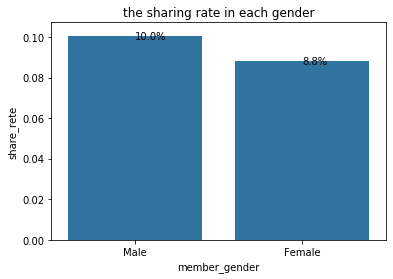

In [13]:
#creating new variale witj numeric values [0,1] for ease the ploting 
frd_main_genders.loc[frd_main_genders.bike_share_for_all_trip == 'Yes', 'share'] = 1
frd_main_genders.loc[frd_main_genders.bike_share_for_all_trip == 'No','share' ]= 0
#getting the propotion for each gender
means = frd_main_genders.groupby('member_gender').mean()['share'].sort_values(ascending=False)

sns.barplot(data=frd_main_genders,x='member_gender',y='share',color=color,errwidth=0);

plt.ylabel('share_rete');
for i in range (means.shape[0]):
    count = means[i]
    pct_string = '{:0.1f}%'.format(100*count)
    plt.text(i, count, pct_string, va='center',);
    
plt.title('the sharing rate in each gender');

looks males share bikes more than females sense the sharing rates was (10%,8.8%)respectivly

## Q: the relation between (duration_minutes, member_birth_year & member_gender) ?

D:\anacoda\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


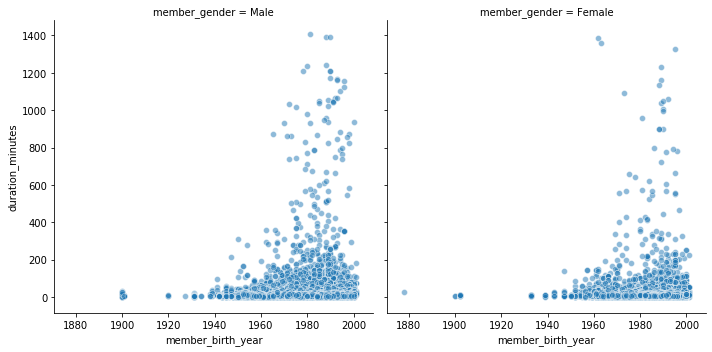

In [14]:
g = sns.FacetGrid(data=frd_main_genders,col='member_gender',size=5);
g.map(sns.scatterplot,'member_birth_year','duration_minutes',alpha=0.5);


- from the plots we can see for the both genders age and duration relation is the same a postive correlation
- although females have fewer data points but most of them have higher duration than males 
- the relation betwean the year of birth and duration is a strong relation but its non-linear

## Q:how the user type relates to the duration in eatch gender ?

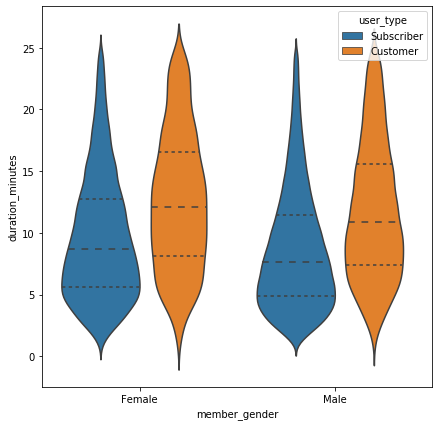

In [15]:
plt.figure(figsize=(7,7))
sns.violinplot(data=frd_bike_droped[frd_bike_droped.member_gender.isin(['Male','Female'])]
               ,x='member_gender',y='duration_minutes',hue='user_type',inner='quartile');


it seems subscribers spend less time with the bikes than customers in both genders, but females still have higher duration even after dropping outliers.